In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import pinv
from cmath import sqrt
from scipy.optimize import curve_fit

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

# $m_{11}$

In [2]:
def m11(k):
    
    x = 1. + np.exp(1.j*k)
    x /= np.sqrt(4. + 2.*np.cos(k))
    
    return x

In [3]:
m11 = np.vectorize(m11)

In [4]:
t = np.linspace(-np.pi,np.pi,1000)

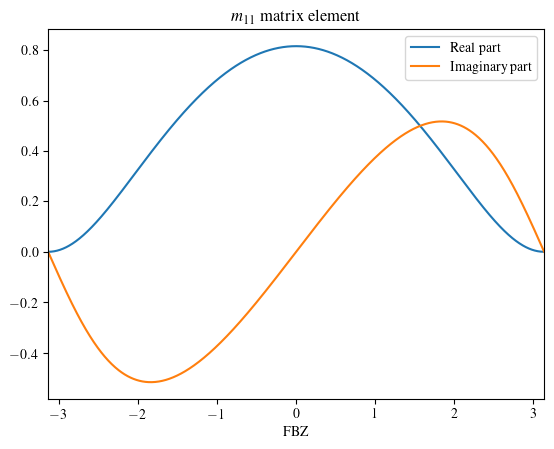

In [5]:
fig = plt.figure()

plt.plot(t,np.real(m11(t)), label="Real part")
plt.plot(t,np.imag(m11(t)), label="Imaginary part")

plt.title(r"$m_{11}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

#plt.savefig("m11.png")
plt.show()

# $m_{12}$

In [6]:
def m12(k):
    
    x = 1.
    x /= np.sqrt(2. + np.cos(k))
    
    return -x

In [7]:
m12 = np.vectorize(m12)

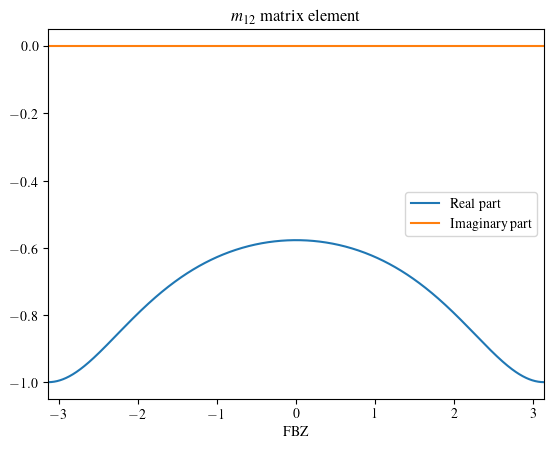

In [8]:
fig = plt.figure()

plt.plot(t,np.real(m12(t)), label="Real part")
plt.plot(t,np.imag(m12(t)), label="Imaginary part")

plt.title(r"$m_{12}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

#plt.savefig("m12.png")
plt.show()

# $m_{21}$

In [9]:
def m21(k):
    
    x = 1. + np.exp(1.j*k)
    x /= np.sqrt(1. + np.cos(k))
    x /= np.sqrt(2. + np.cos(k))
    
    return x

In [10]:
m21 = np.vectorize(m21)

C:\Users\enric\AppData\Local\Temp\ipykernel_28964\1511846962.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  x /= np.sqrt(1. + np.cos(k))
C:\Users\enric\AppData\Local\Temp\ipykernel_28964\1511846962.py:4: RuntimeWarning: invalid value encountered in scalar divide
  x /= np.sqrt(1. + np.cos(k))
C:\Users\enric\AppData\Local\Temp\ipykernel_28964\1511846962.py:5: RuntimeWarning: invalid value encountered in scalar divide
  x /= np.sqrt(2. + np.cos(k))
C:\Users\enric\.conda\envs\main\lib\site-packages\numpy\lib\function_base.py:2412: RuntimeWarning: invalid value encountered in m21 (vectorized)
  outputs = ufunc(*inputs)


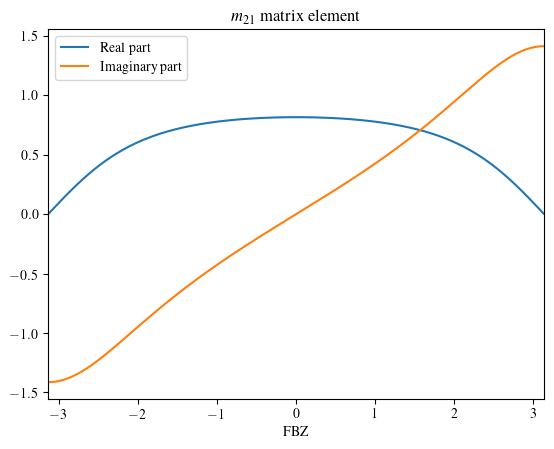

In [11]:
fig = plt.figure()

plt.plot(t,np.real(m21(t)), label="Real part")
plt.plot(t,np.imag(m21(t)), label="Imaginary part")

plt.title(r"$m_{21}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

plt.savefig("m21.png")
plt.show()

# $m_{22}$

In [12]:
def m22(k):
    
    x = np.sqrt(1. + np.cos(k))
    x /= np.sqrt(2. + np.cos(k))
    
    return x

In [13]:
m22 = np.vectorize(m22)

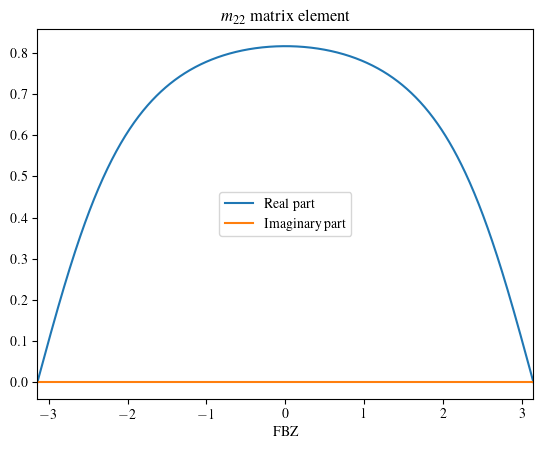

In [14]:
fig = plt.figure()

plt.plot(t,np.real(m22(t)), label="Real part")
plt.plot(t,np.imag(m22(t)), label="Imaginary part")

plt.title(r"$m_{22}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

plt.savefig("m22.png")
plt.show()

# Self-energy

## Coupling to an A site

We calculate the self-energy when an atom is locally coupled to an A site and compare it to the analytical solution.

In [15]:
def slfen_a(z,N,g,eta=0.):
    
    k = np.linspace(-np.pi,np.pi,N,endpoint=True)
    om_a = 2.*np.ones(N)
    om_b = -2*(1+np.cos(k))
    z = z*np.ones(N)
    
    Sigma = np.sum( np.abs(m12(k))**2/(z-om_b+1.j*eta) )
    Sigma += np.sum( (np.abs(m11(k))**2)/(z-om_a+1.j*eta) )
    
    return Sigma*(g**2)/N

In [16]:
def an_slf_a(z,g,t,eta=0.):

    om_a = 2.
    Sigma = z/np.sqrt((z+2*t)**2 - 4 * t**2) + 0.j
    Sigma *= 1/(z-om_a+1.j*eta)
    Sigma *= g**2
    
    return Sigma

In [17]:
slfen_a = np.vectorize(slfen_a)

In [18]:
N = 400
g = 0.1
t = 1.
eta = -2*np.pi/N
E = np.linspace(1.,3.,1000)

In [19]:
res = slfen_a(E,N,g,eta)

In [20]:
res_an = an_slf_a(E,g,t,1.3*eta)

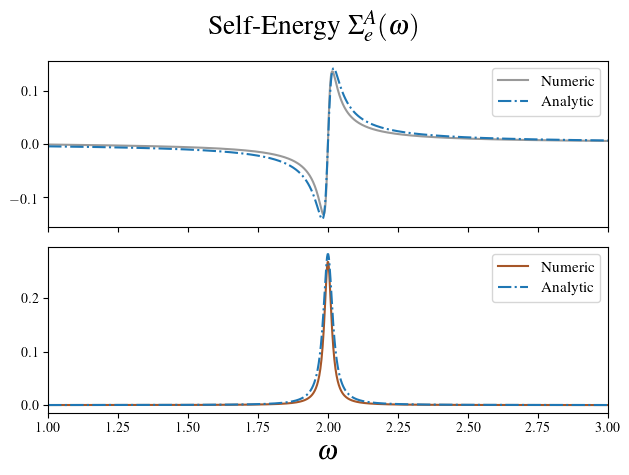

In [21]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=True)

plt.suptitle(r"Self-Energy $\Sigma_e^A(\omega)$",fontsize=20)

ax[0].plot(E,np.real(res),c='#999999',label="Numeric")
ax[0].plot(E,np.real(res_an),label="Analytic",ls="-.")

ax[1].plot(E,np.imag(res),c='#a65628',label="Numeric")
ax[1].plot(E,np.imag(res_an),label="Analytic",ls="-.")

#ax[0].set_ylim(-0.02,0.02)

ax[1].set_xlabel(r"$\omega$",fontsize=20)

ax[1].set_xlim(E[0],E[-1])

ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

#plt.savefig("SE_a_zoom.png")
plt.show()

## Coupling to a B site

In [22]:
def slfen_b(z,N,g,eta=0.):
    
    k = np.linspace(-np.pi+0.001,np.pi-0.001,N)
    om_a = 2.*np.ones(N)
    om_b = -2*(1+np.cos(k))
    z = z*np.ones(N)
    
    Sigma = np.sum( np.abs(m22(k))**2/(z-om_b+1.j*eta) )
    Sigma += np.sum( (np.abs(m21(k))**2)/(z-om_a+1.j*eta) )
    
    return Sigma*(g**2)/N

In [23]:
def an_slf_b(z,g,t,eta=0.):

    om_a = 2.
    Sigma = 1/np.sqrt(3) - 4*t/np.sqrt((z+2*t)**2 - 4 * t**2) + 0.j
    Sigma *= 1/(z-om_a+1.j*eta)
    Sigma *= -g**2
    
    return Sigma

In [24]:
slfen_b = np.vectorize(slfen_b)

In [25]:
N = 400
g = 0.1
t = 1
E = np.linspace(1,3,1000)

In [26]:
res = slfen_b(E,N,g,-2*np.pi/N)

In [27]:
res_an = an_slf_b(E,g,t,0.5*eta) 

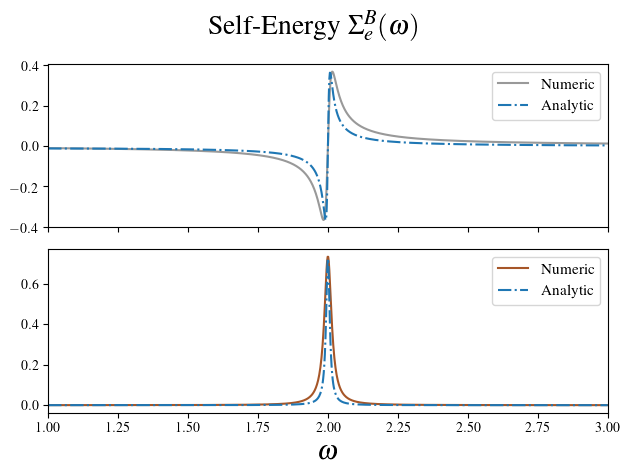

In [28]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=True)

plt.suptitle(r"Self-Energy $\Sigma_e^B(\omega)$",fontsize=20)

ax[0].plot(E,np.real(res),c='#999999',label="Numeric")
ax[0].plot(E,np.real(res_an),label="Analytic",ls="-.")

ax[1].plot(E,np.imag(res),c='#a65628',label="Numeric")
ax[1].plot(E,np.imag(res_an),label="Analytic",ls="-.")

#ax[0].set_ylim(-0.02,0.02)

ax[1].set_xlabel(r"$\omega$",fontsize=20)

ax[1].set_xlim(E[0],E[-1])

ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

#plt.savefig("SE_a_zoom.png")
plt.show()

In [29]:
def expf(x,a,b):
    
    return a*np.exp(-x*b)

We first express the calculated V-shaped CLSs in the position space. The matrix which contains the information about the coefficients is the Sites-to-CLS matrix (StC).

In [30]:
N = 200
StC = np.zeros((N,2*N))

base = np.zeros(2*N)
base[0] = 1.
base[2] = 1.
base[3] = -np.sqrt(2)

for i in range(1,N,1):
    StC[i,:] = np.roll(base,2*(i-1))
StC[0,0] = 1.
StC[0,1] = -np.sqrt(2)
StC[0,-1] = 1.

StC *= 0.5

We find the pseudo-inverse of StC and we call it CtS.

In [31]:
CtS = pinv(StC)

We fit the squared coefficient to find its behaviour.

In [32]:
n = 150 #we look at a_n, so this should be even

In [33]:
popt, pcov = curve_fit(expf,np.arange(0,23,1),CtS[n,n//2 + 1:n//2+24]**2,bounds=((0,0),(1,4)))

In [34]:
print(f"The amplitude is {popt[0]:.13e} \u00B1 {np.sqrt(pcov[0,0]):.0e}")
print(f"The decay factor is {popt[1]:.12e} \u00B1 {np.sqrt(pcov[1,1]):.0e}")

The amplitude is 1.7863279495421e-01 ± 3e-14
The decay factor is 2.633915793848e+00 ± 2e-12


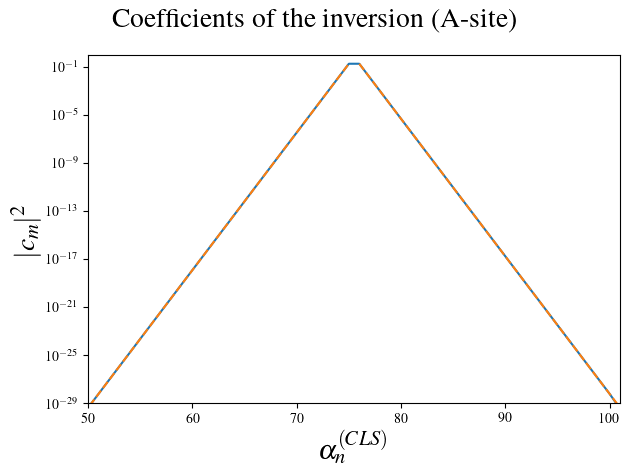

In [35]:
fig = plt.figure(tight_layout=True)

plt.suptitle("Coefficients of the inversion (A-site)",fontsize=20)

plt.plot(CtS[n]**2,label="$a_{150}$",c="C0")
plt.plot(np.arange(n//2 + 1,200,1),expf(np.arange(0,199 - n//2,1),*popt),ls="--",c="C1")
plt.plot(np.arange(0,n//2 + 1,1),expf(np.arange(0,n//2 + 1,1)[::-1],popt[0],popt[1]),ls="--",c="C1")

plt.yscale("log")
plt.xlabel(r"$\alpha^{(CLS)}_n$",fontsize=20)
plt.ylabel(r"$|c_m|^2$",fontsize=20)
plt.xlim(n//2 - 25,n//2 + 26)
plt.ylim(1e-29,1)

plt.savefig("inv_Asite_log.png")
plt.show()

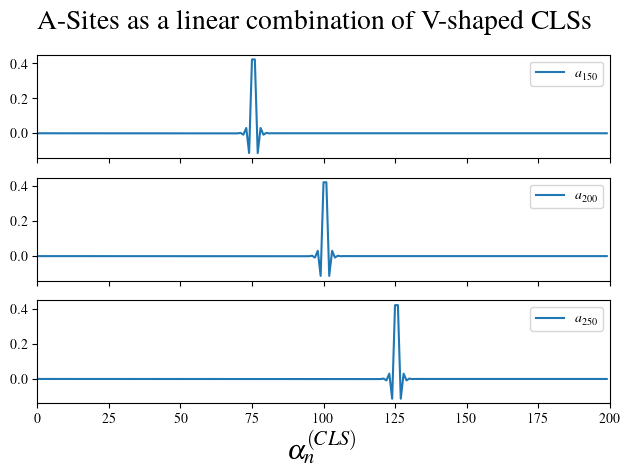

In [36]:
fig,ax = plt.subplots(nrows=3,ncols=1,sharex=True,tight_layout=True)

plt.suptitle("A-Sites as a linear combination of V-shaped CLSs",fontsize=20)

n = 150
ax[0].plot(CtS[n],label="$a_{150}$")
n = 200
ax[1].plot(CtS[n],label="$a_{200}$")
n = 250
ax[2].plot(CtS[n],label="$a_{250}$")

plt.xlabel(r"$\alpha^{(CLS)}_n$",fontsize=20)
plt.xlim(0,200)

for i in range(3):
    ax[i].legend()

plt.savefig("inv_Asite.png")
plt.show()

We repeat the procedure for a B-site.

In [37]:
m = 151

In [38]:
popt, pcov = curve_fit(expf,np.arange(0,23,1),CtS[m,m//2:m//2+23]**2,bounds=((0,0),(1,4)))

In [39]:
print(f"The amplitude is {popt[0]:.8e} \u00B1 {np.sqrt(pcov[0,0]):.0e}")
print(f"The decay factor is {popt[1]:.8e} \u00B1 {np.sqrt(pcov[1,1]):.0e}")

The amplitude is 6.66666659e-01 ± 2e-09
The decay factor is 2.63391569e+00 ± 4e-08


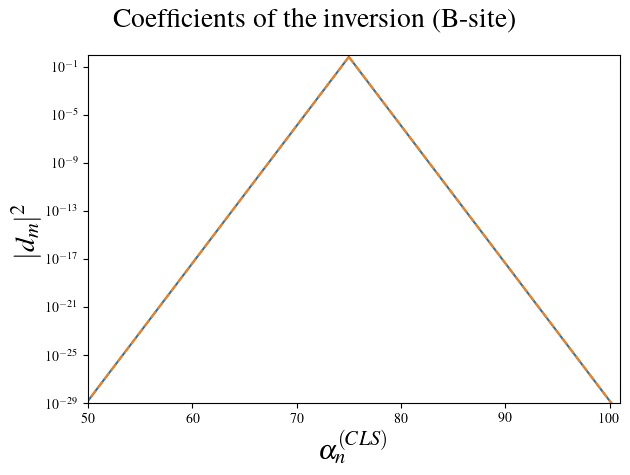

In [40]:
fig = plt.figure(tight_layout=True)

plt.suptitle("Coefficients of the inversion (B-site)",fontsize=20)
m = 151
plt.plot(CtS[m]**2,label="$b_{150}$",c="C0")
plt.plot(np.arange(m//2,200,1),expf(np.arange(0,200 - m//2,1),*popt),ls="--",c="C1")
plt.plot(np.arange(0,m//2+1,1),expf(np.arange(0,m//2+1,1)[::-1],popt[0],popt[1]),ls="--",c="C1")

plt.yscale("log")
plt.xlabel(r"$\alpha^{(CLS)}_n$",fontsize=20)
plt.ylabel(r"$|d_m|^2$",fontsize=20)
plt.xlim(m//2 - 25,m//2 + 26)
plt.ylim(1e-29,1)

plt.savefig("inv_Bsite_log.png")
plt.show()